In [7]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


## Convergence using networkx PageRank function

C:\Users\soprr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


PageRank values:
Node 1: 0.10135204313956028
Node 2: 0.1283793866092669
Node 3: 0.6418891836419056
Node 4: 0.1283793866092669


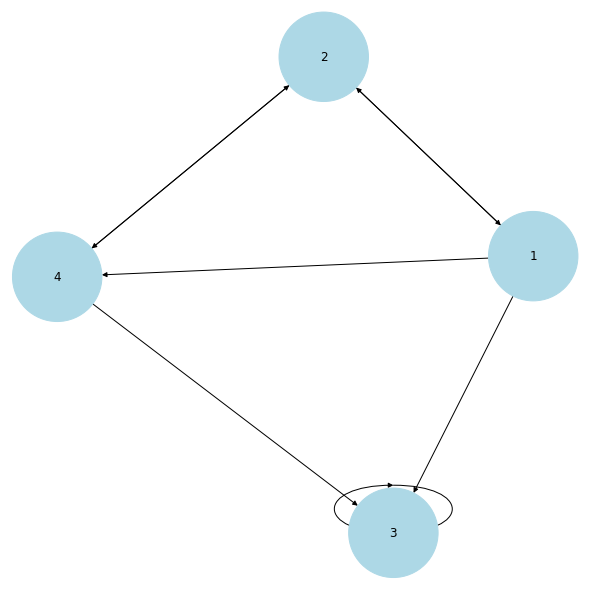

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set a fixed seed for the random number generator
np.random.seed(42)

# Define the adjacency list with 1-based node labels
adjacency_list = {
    1: [2,3,4],
    2: [1, 4],
    3: [3],
    4: [2, 3]
}

# Create a directed graph from the adjacency list
G = nx.DiGraph(adjacency_list)

# Calculate PageRank
pagerank = nx.pagerank(G, alpha=0.80)

# Print PageRank values
print("PageRank values:")
for node, value in pagerank.items():
    print(f"Node {node}: {value}")

# Draw the graph with adjusted figure size
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[2000 * v for v in dict(G.degree).values()], node_color='lightblue')
plt.show()


## Mathematical proof of convergence

### Simplified PageRank

In [7]:
def page_rank_simplified(adjacency_matrix, max_iterations=500):

    number_of_nodes = adjacency_matrix.shape[0]
    page_rank_scores = np.ones(number_of_nodes) / number_of_nodes

    for i in range(max_iterations):
        # Perform the matrix-vector multiplication
        new_page_rank_scores = adjacency_matrix.T.dot(page_rank_scores)

        # Check for convergence
        if np.allclose(page_rank_scores, new_page_rank_scores):
            break

        page_rank_scores = new_page_rank_scores

        if np.isnan(new_page_rank_scores).any():
            print(f"iteration:{i}")

    return page_rank_scores, i

adjacency_matrix = np.array([[0, 1/2, 0, 0],
                           [1/3, 0, 0, 1/2],
                           [1/3, 0, 1, 1/2],
                           [1/3, 1/2, 0, 0]])
adjacency_matrix = np.transpose(adjacency_matrix)

page_ranks, no_of_iteration = page_rank_simplified(adjacency_matrix)
print(f"closed form: {page_ranks.round(2)}")
print(f"number of iterations: {no_of_iteration}")

closed form: [0. 0. 1. 0.]
number of iterations: 51


### Modified PageRank (Iterative Approach)

In [1]:
import numpy as np

adjacency_list = {
    1: [2,3,4],
    2: [1, 4],
    3: [3],
    4: [2, 3]
}

# Initialize PageRank values
N = len(adjacency_list)
pagerank = {node: 1 / N for node in adjacency_list}

# Damping factor
alpha = 0.8

# Iterate to calculate PageRank values
iterations = 0
max_iterations = 100
tolerance = 1e-6
while True:
    new_pagerank = {}
    for node in adjacency_list:
        new_pagerank[node] = (1 - alpha) / N + alpha * sum(pagerank[neighbor] / len(adjacency_list[neighbor])
                                                            for neighbor in adjacency_list if node in adjacency_list[neighbor])
    
    # Check for convergence
    diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in pagerank)
    if diff < tolerance or iterations >= max_iterations:
        break
    
    pagerank = new_pagerank
    iterations += 1


# Print the final PageRank values and number of iterations
print(f"Final PageRank values after {iterations} iterations:")
for node, value in pagerank.items():
    print(f"Node {node}: {value}")
    


Final PageRank values after 24 iterations:
Node 1: 0.1013515864590358
Node 2: 0.12837872103069092
Node 3: 0.6418909714795822
Node 4: 0.12837872103069092


### Modified PageRank (Closed-Form Formula)

In [2]:
import numpy as np

# Define the matrix M and the damping factor alpha
M = np.array([[0, 1/2, 0, 0],
               [1/3, 0, 0, 1/2],
               [1/3, 0, 1, 1/2],
               [1/3, 1/2, 0, 0]])

alpha = 0.80

# Calculate the number of nodes (T) and the column matrix E
T = M.shape[0]
print("T:" , T)
E = np.ones((T, 1)) / T

# Calculate the PageRank values using the closed-form formula
R = np.linalg.inv(np.eye(T) - alpha * M).dot((1 - alpha) * E)

# Print the PageRank values
print("PageRank values:")
for node, value in enumerate(R.flatten(), start=1):
    print(f"Node {node}: {value}")


T: 4
PageRank values:
Node 1: 0.10135135135135134
Node 2: 0.12837837837837837
Node 3: 0.6418918918918919
Node 4: 0.12837837837837837


## PageRank Algorithm for larger graphs

PageRank values:
Node 1: 0.04707352557847061
Node 2: 0.03753287859301058
Node 3: 0.056741291330204516
Node 4: 0.056500858189935305
Node 5: 0.05591731689975327
Node 6: 0.046659216368501635
Node 7: 0.05658082479488895
Node 8: 0.04790790025079557
Node 9: 0.048406399940792405
Node 10: 0.04921176541668984
Node 11: 0.04964960245930608
Node 12: 0.05009608198371403
Node 13: 0.050534056764619265
Node 14: 0.051084303416038146
Node 15: 0.05183856815627878
Node 16: 0.05295001940350284
Node 17: 0.05462064552337158
Node 18: 0.05720181107061684
Node 19: 0.04583045123692324
Node 20: 0.03366248262258664
sum:  0.9999999999999999


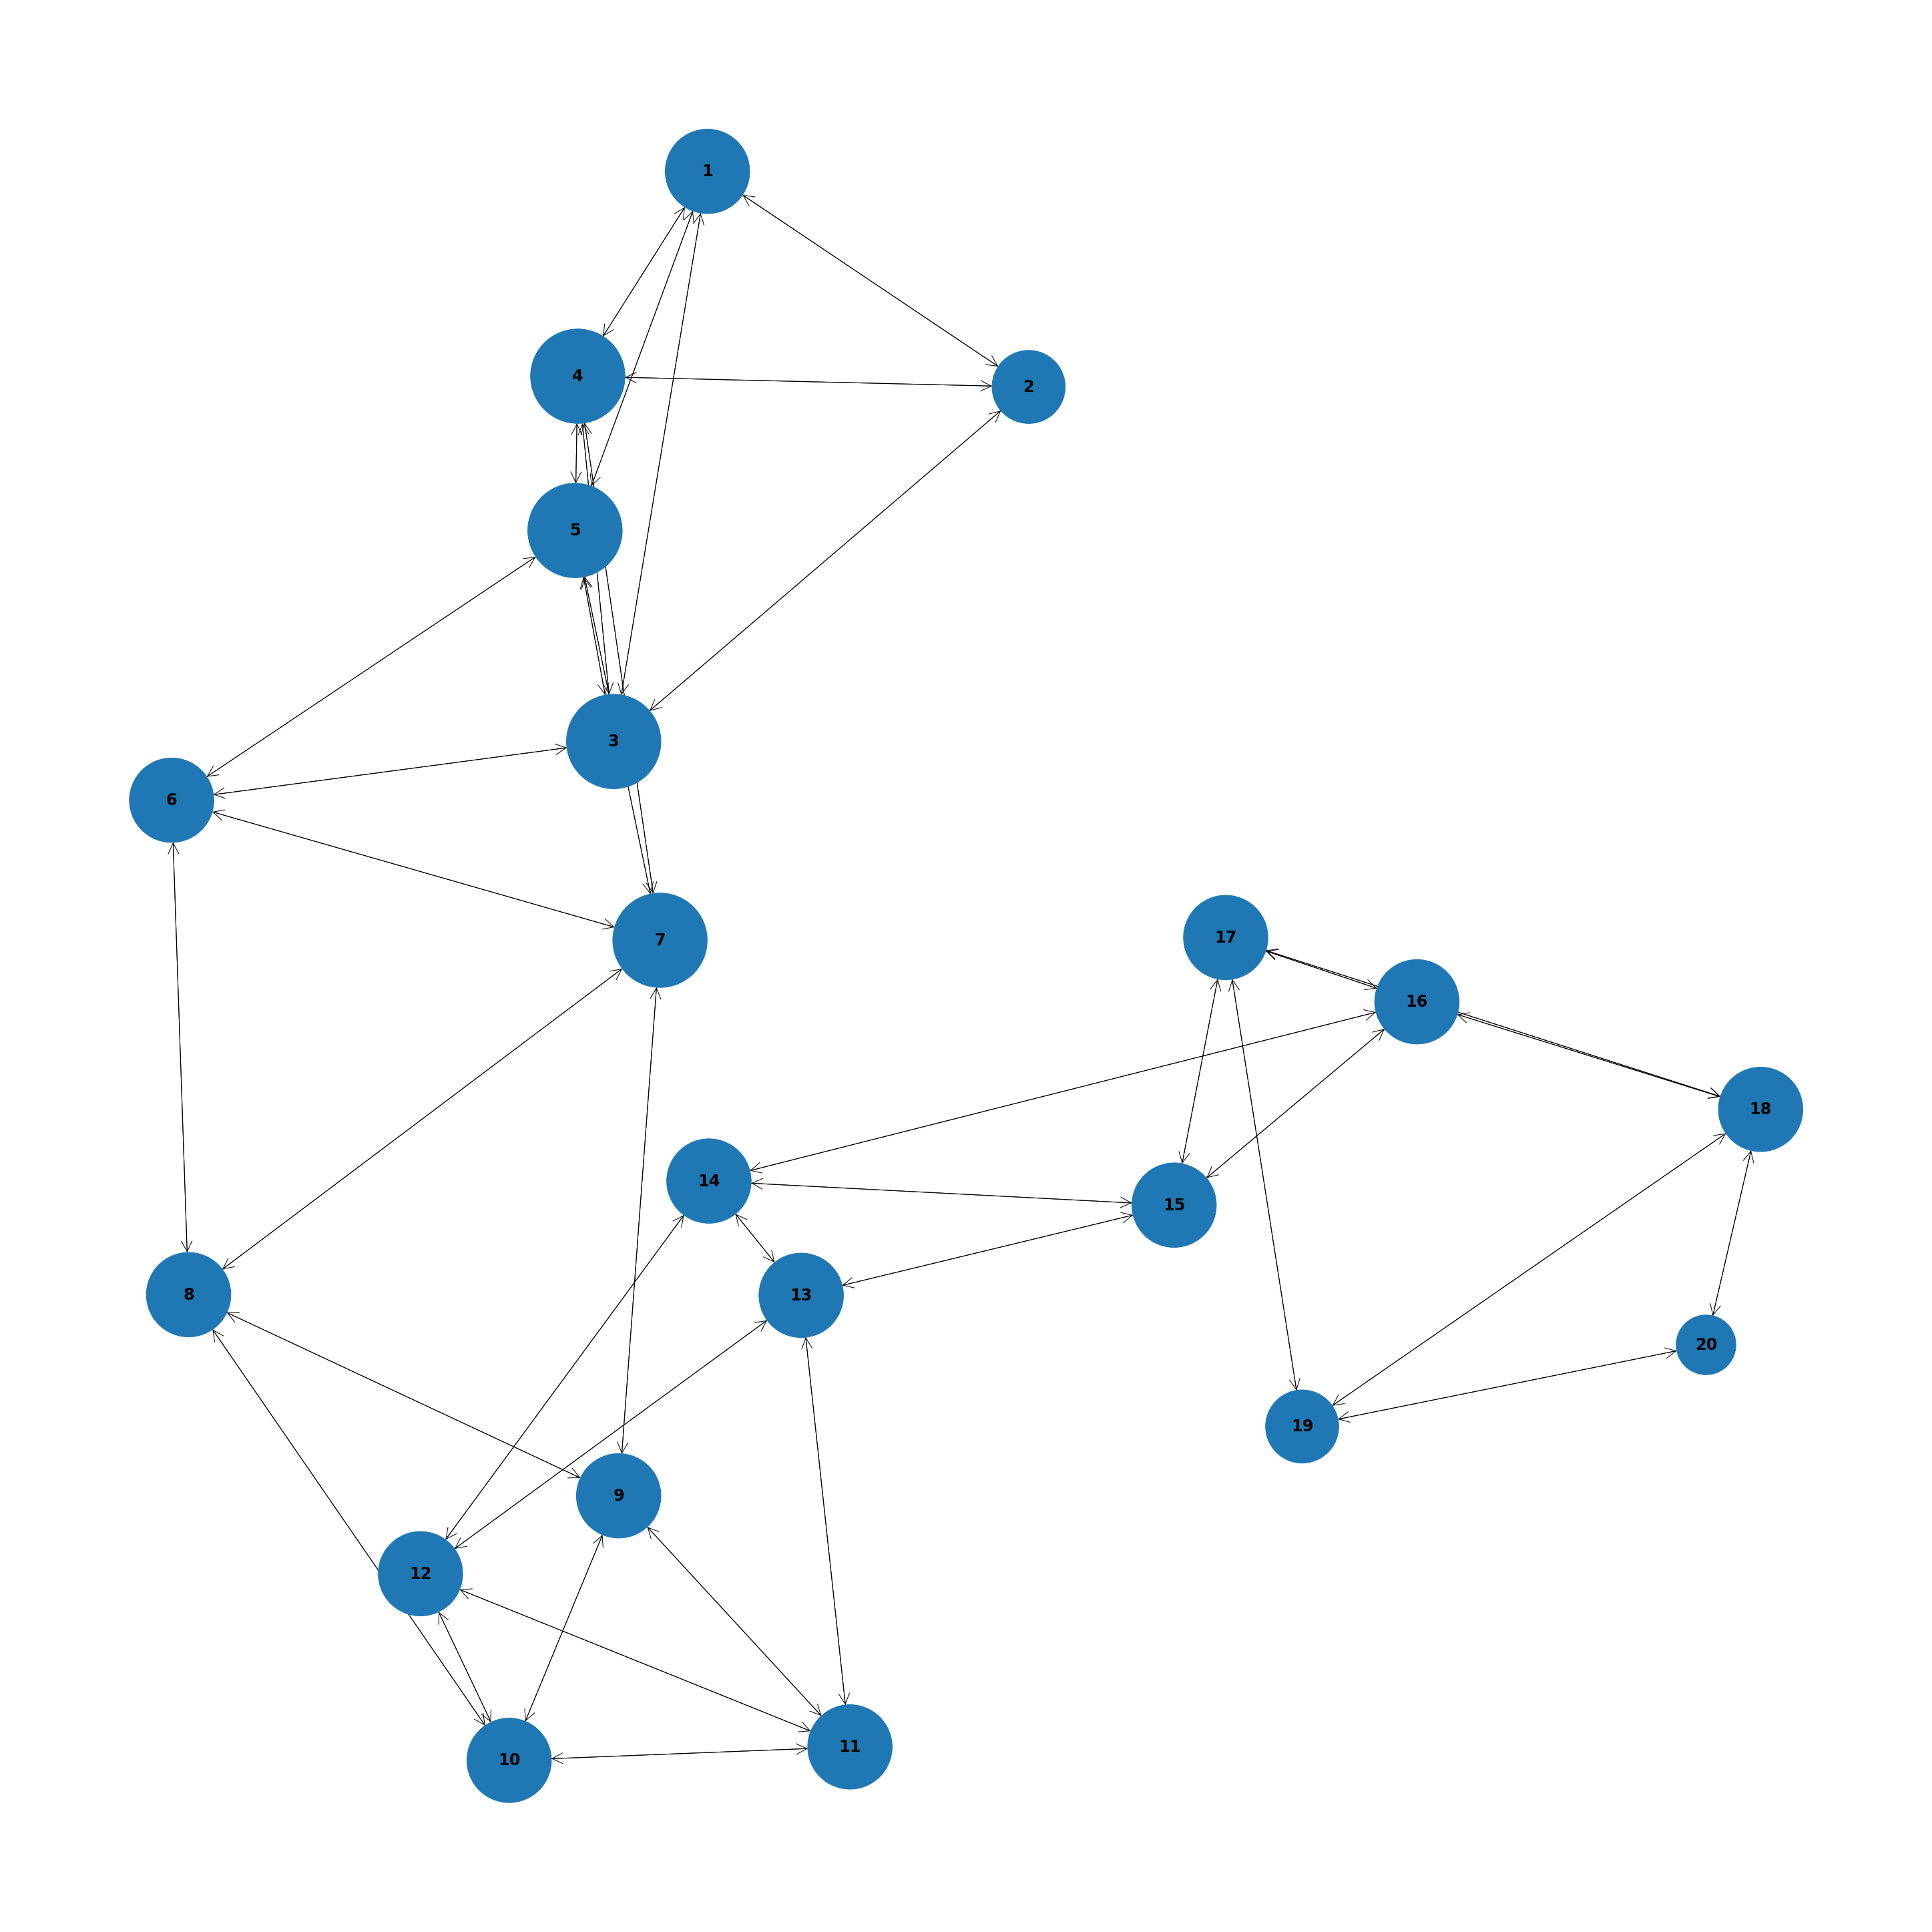

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set a fixed seed for the random number generator
np.random.seed(42)

# Define the adjacency list with 1-based node labels
adjacency_list = {
    1: [2, 3, 4, 5],
    2: [1, 3, 4],
    3: [1, 2, 4, 5, 6],
    4: [1, 2, 3, 5, 7],
    5: [1, 3, 4, 6, 7],
    6: [3, 5, 7, 8],
    7: [4, 5, 6, 8, 9],
    8: [6, 7, 9, 10],
    9: [7, 8, 10, 11],
    10: [8, 9, 11, 12],
    11: [9, 10, 12, 13],
    12: [10, 11, 13, 14],
    13: [11, 12, 14, 15],
    14: [12, 13, 15, 16],
    15: [13, 14, 16, 17],
    16: [14, 15, 17, 18],
    17: [15, 16, 18, 19],
    18: [16, 17, 19, 20],
    19: [17, 18, 20],
    20: [18, 19]
}


# Create a directed graph from the adjacency list
G = nx.DiGraph(adjacency_list)

# Calculate PageRank
pagerank = nx.pagerank(G, alpha=0.80)
sum = 0
# Print PageRank values
print("PageRank values:")
for node, value in pagerank.items():
    sum += value
    print(f"Node {node}: {value}")
print("sum: ", sum)


plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=[2000 * v for v in dict(G.degree).values()], arrowstyle='->', arrowsize=40, font_size=24, font_weight='bold')
plt.show()


## Mathemical Proof of Convergence

### Verify above PageRank Values using closed-form formula

In [11]:
import numpy as np

adjacency_list = {
    1: [2, 3, 4, 5],
    2: [1, 3, 4],
    3: [1, 2, 4, 5, 6],
    4: [1, 2, 3, 5, 7],
    5: [1, 3, 4, 6, 7],
    6: [3, 5, 7, 8],
    7: [4, 5, 6, 8, 9],
    8: [6, 7, 9, 10],
    9: [7, 8, 10, 11],
    10: [8, 9, 11, 12],
    11: [9, 10, 12, 13],
    12: [10, 11, 13, 14],
    13: [11, 12, 14, 15],
    14: [12, 13, 15, 16],
    15: [13, 14, 16, 17],
    16: [14, 15, 17, 18],
    17: [15, 16, 18, 19],
    18: [16, 17, 19, 20],
    19: [17, 18, 20],
    20: [18, 19]
}

# Create an empty adjacency matrix
adjacency_matrix = [[0] * len(adjacency_list) for _ in range(len(adjacency_list))]

# Fill in the adjacency matrix based on the incoming edges
for node, outgoing_nodes in adjacency_list.items():
    for outgoing_node in outgoing_nodes:
        adjacency_matrix[outgoing_node - 1][node - 1] = 1 / len(outgoing_nodes)

M = np.array(adjacency_matrix)
alpha = 0.80
                                                                
# Calculate the number of nodes (T) and the column matrix E
T = M.shape[0]
print("T:" , T)
E = np.ones((T, 1)) / T

# Calculate the PageRank values using the closed-form formula
R = np.linalg.inv(np.eye(T) - alpha * M).dot((1 - alpha) * E)

# Print the PageRank values
print("PageRank values:")
for node, value in enumerate(R.flatten(), start=1):
    print(f"Node {node}: {value}")

T: 20
PageRank values:
Node 1: 0.04707698513041342
Node 2: 0.037535491622486115
Node 3: 0.056745535916579326
Node 4: 0.05650505531094217
Node 5: 0.055921413133418835
Node 6: 0.04666219753367946
Node 7: 0.056584262526230084
Node 8: 0.047910018407414684
Node 9: 0.04840792193456746
Node 10: 0.04921256254784239
Node 11: 0.04964961869659616
Node 12: 0.050095253700633655
Node 13: 0.050532355299937305
Node 14: 0.05108173195879248
Node 15: 0.051835172143664204
Node 16: 0.05294587864972719
Node 17: 0.05461589480986405
Node 18: 0.05719659433631526
Node 19: 0.04582637168971017
Node 20: 0.03365968465118577


## Tuning Damping Factor

In [37]:
import numpy as np

# Function to generate a random network
def generate_random_network(min_nodes, max_nodes, min_links, max_links, dead_end_probability):
    num_nodes = np.random.randint(min_nodes, max_nodes + 1)
    num_links = np.random.randint(min_links, max_links + 1)
    print("number of nodes: ", num_nodes)
    print("number of links: ", num_links)
    adjacency_list = {}
    for node in range(1, num_nodes + 1):
        outgoing_nodes = np.random.choice(range(1, num_nodes + 1), num_links, replace=False)
        if np.random.rand() < dead_end_probability:
            outgoing_nodes = []

        adjacency_list[node] = list(outgoing_nodes)

    return adjacency_list

# Calculate PageRank values and number of iterations for different damping factors
def pagerank_iteration(adjacency_list, damping_factor, max_iterations=100, tolerance=1e-6):
    N = len(adjacency_list)
    pagerank = {node: 1 / N for node in adjacency_list}

    # Initialize adjacency matrix
    adjacency_matrix = [[0] * N for _ in range(N)]

    for node, outgoing_nodes in adjacency_list.items():
        for outgoing_node in outgoing_nodes:
            adjacency_matrix[outgoing_node - 1][node - 1] = 1 / len(outgoing_nodes)

    M = np.array(adjacency_matrix)
    alpha = damping_factor

    # Calculate the number of nodes (T) and the column matrix E
    T = M.shape[0]
    E = np.ones((T, 1)) / T

    iterations = 0
    while True:
        new_pagerank = {}
        for node in adjacency_list:
            new_pagerank[node] = (1 - alpha) / N + alpha * sum(pagerank[neighbor] * M[node - 1, neighbor - 1] for neighbor in adjacency_list if node in adjacency_list[neighbor])

        # Check for convergence
        diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in pagerank)
        if diff < tolerance or iterations >= max_iterations:
            break

        pagerank = new_pagerank
        iterations += 1

    return pagerank, iterations

# Generate a random network
adjacency_list = generate_random_network(20, 50, 30, 70, 0.01)

# Calculate PageRank values and number of iterations for different damping factors
damping_factors = [i * 0.1 for i in range(1,11)]
for alpha in damping_factors:
    # Iterative approach
    pagerank_iterative, iterations = pagerank_iteration(adjacency_list, alpha)

    # Closed-form formula
    adjacency_matrix = [[0] * len(adjacency_list) for _ in range(len(adjacency_list))]
    for node, outgoing_nodes in adjacency_list.items():
        for outgoing_node in outgoing_nodes:
            adjacency_matrix[outgoing_node - 1][node - 1] = 1 / len(outgoing_nodes)

    M = np.array(adjacency_matrix)
    T = M.shape[0]
    E = np.ones((T, 1)) / T
    R_closed_form = np.linalg.inv(np.eye(T) - alpha * M).dot((1 - alpha) * E).flatten()

    # Calculate deviation
    deviation = sum(abs(pagerank_iterative[node] - R_closed_form[node - 1]) for node in range(1, len(adjacency_list) + 1))

    print(f"Damping Factor: {round(alpha,3)}, Iterations: {iterations}, Deviation: {deviation.round(3)}")



number of nodes:  34
number of links:  31
Damping Factor: 0.1, Iterations: 2, Deviation: 0.0
Damping Factor: 0.2, Iterations: 2, Deviation: 0.0
Damping Factor: 0.3, Iterations: 3, Deviation: 0.0
Damping Factor: 0.4, Iterations: 3, Deviation: 0.0
Damping Factor: 0.5, Iterations: 3, Deviation: 0.0
Damping Factor: 0.6, Iterations: 3, Deviation: 0.0
Damping Factor: 0.7, Iterations: 4, Deviation: 0.0
Damping Factor: 0.8, Iterations: 4, Deviation: 0.0
Damping Factor: 0.9, Iterations: 4, Deviation: 0.0
Damping Factor: 1.0, Iterations: 4, Deviation: 1.0


## MapReduce

In [56]:
import numpy as np

def mapper(damping_factor, nodes, pagerank, new_pagerank):
    for node, neighbors in nodes.items():
        new_pagerank.update({neighbor: new_pagerank.get(neighbor, 0) + damping_factor * pagerank[node] / len(neighbors) for neighbor in neighbors})
    return new_pagerank

def reducer(damping_factor, nodes, pagerank, new_pagerank, N):
    for node in nodes:
        pagerank[node] = new_pagerank.get(node, 0) + (1 - damping_factor) / N
    return pagerank

def calculate_pagerank(nodes, damping_factor, num_iterations):
    N = len(nodes)
    initial_pr = 1 / N
    pagerank = {node: initial_pr for node in nodes}

    for _ in range(num_iterations):
        new_pagerank = {node: 0 for node in nodes}
        new_pagerank = mapper(damping_factor, nodes, pagerank, new_pagerank)
        pagerank = reducer(damping_factor, nodes, pagerank, new_pagerank, N)

    return pagerank


adjacency_list = {
    1: [2, 3, 4, 5],
    2: [1, 3, 4],
    3: [1, 2, 4, 5, 6],
    4: [1, 2, 3, 5, 7],
    5: [1, 3, 4, 6, 7],
    6: [3, 5, 7, 8],
    7: [4, 5, 6, 8, 9],
    8: [6, 7, 9, 10],
    9: [7, 8, 10, 11],
    10: [8, 9, 11, 12],
    11: [9, 10, 12, 13],
    12: [10, 11, 13, 14],
    13: [11, 12, 14, 15],
    14: [12, 13, 15, 16],
    15: [13, 14, 16, 17],
    16: [14, 15, 17, 18],
    17: [15, 16, 18, 19],
    18: [16, 17, 19, 20],
    19: [17, 18, 20],
    20: [18, 19]
}

damping_factor = 0.85
num_iterations = 10
pagerank_values = calculate_pagerank(adjacency_list,damping_factor,num_iterations)

# print the results
print("PageRank values for MapReduce:")
for node, pr in pagerank_values.items():
    print(f"Node {node}: {pr}")
total = sum(pagerank_values.values())
print("sum: ", round(total,4))
print()


# Compare against closed-form formula
adjacency_matrix = [[0] * len(adjacency_list) for _ in range(len(adjacency_list))]

# Fill in the adjacency matrix based on the incoming edges
for node, outgoing_nodes in adjacency_list.items():
    for outgoing_node in outgoing_nodes:
        adjacency_matrix[outgoing_node - 1][node - 1] = 1 / len(outgoing_nodes)

M = np.array(adjacency_matrix)
alpha = 0.85
                                                                
# Calculate the number of nodes (T) and the column matrix E
T = M.shape[0]
E = np.ones((T, 1)) / T

# Calculate the PageRank values using the closed-form formula
R = np.linalg.inv(np.eye(T) - alpha * M).dot((1 - alpha) * E)

# Print the PageRank values
print("PageRank values for closed-form formula:")
for node, value in enumerate(R.flatten(), start=1):
    print(f"Node {node}: {value}")
   
print()    
# Find the deviation
deviation = sum(abs(pagerank_values[node] - R[node - 1][0]) for node in adjacency_list)
print("Deviation:", deviation)


PageRank values for MapReduce:
Node 1: 0.04687348528690694
Node 2: 0.036815259930302976
Node 3: 0.057042712614559836
Node 4: 0.0568666488150254
Node 5: 0.05642088510169519
Node 6: 0.04663619297508421
Node 7: 0.057077255186891655
Node 8: 0.047803572313063945
Node 9: 0.04832981723597835
Node 10: 0.04911972815071805
Node 11: 0.049629391339331065
Node 12: 0.05016652819803844
Node 13: 0.05071555467566853
Node 14: 0.051370439051249835
Node 15: 0.05220285936859128
Node 16: 0.05333873451779931
Node 17: 0.05489287424773402
Node 18: 0.057117475757290946
Node 19: 0.045126705839926444
Node 20: 0.03245387939414352
sum:  1.0

PageRank values for closed-form formula:
Node 1: 0.04696453012450787
Node 2: 0.036883294773316366
Node 3: 0.057157131573427444
Node 4: 0.05698011620221044
Node 5: 0.05653488911888111
Node 6: 0.04672635842326742
Node 7: 0.05718966576835545
Node 8: 0.04788927870566837
Node 9: 0.04840607987704015
Node 10: 0.04918302299403572
Node 11: 0.04967516510697691
Node 12: 0.0501848786351885